In [1]:
import pandas as pd 
import numpy as np
import lightgbm as lgb
import sklearn

In [2]:
train = pd.read_csv('input/FEd_train.csv')
tr = train.copy()

In [3]:
off = pd.read_csv('offensepersonnel.csv')
dff = pd.read_csv('deffensepersonnel.csv')

In [49]:
a = pd.concat([train, off], sort=False, axis=1)

In [50]:
a.head()

,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,...,HomeField,Field_eq_Possession,OFF_RB,OFF_DB,OFF_OL,OFF_WR,OFF_DL,OFF_TE,OFF_QB,OFF_LB
0,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,29,2017,...,False,True,1,1,0,3,0,1,0,0
1,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,97,2017,...,False,True,1,0,0,3,0,1,0,0
2,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,50,2017,...,False,True,1,0,0,3,0,1,0,0
3,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,56,2017,...,False,True,1,0,0,3,0,1,0,0
4,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,38,2017,...,False,True,1,0,0,3,0,1,0,0


In [51]:
train.columns

Index(['X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId',
       'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock',
       'PossessionTeam', 'Down', 'Distance', 'FieldPosition',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher',
       'OffenseFormation', 'DefendersInTheBox', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerBirthDate', 'Position', 'Week', 'StadiumType',
       'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed',
       'TotalScore', 'CumGameClock', 'VsTeam', 'HomeTeam', 'IsOffense',
       'TimeDelta', 'HomeField', 'Field_eq_Possession'],
      dtype='object')

In [52]:
off.columns

Index(['OFF_RB', 'OFF_DB', 'OFF_OL', 'OFF_WR', 'OFF_DL', 'OFF_TE', 'OFF_QB',
       'OFF_LB'],
      dtype='object')

In [53]:
len(train.columns)

42

In [54]:
aa = pd.concat([a, dff], sort=False, axis=1)

In [55]:
aa.head()

,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,...,OFF_OL,OFF_WR,OFF_DL,OFF_TE,OFF_QB,OFF_LB,DEF_OL,DEF_DL,DEF_DB,DEF_LB
0,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,29,2017,...,0,3,0,1,0,0,0,2,6,3
1,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,97,2017,...,0,3,0,1,0,0,0,2,6,3
2,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,50,2017,...,0,3,0,1,0,0,0,2,6,3
3,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,56,2017,...,0,3,0,1,0,0,0,2,6,3
4,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,38,2017,...,0,3,0,1,0,0,0,2,6,3


In [56]:
print(aa.columns)

Index(['X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId',
       'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock',
       'PossessionTeam', 'Down', 'Distance', 'FieldPosition',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher',
       'OffenseFormation', 'DefendersInTheBox', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerBirthDate', 'Position', 'Week', 'StadiumType',
       'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed',
       'TotalScore', 'CumGameClock', 'VsTeam', 'HomeTeam', 'IsOffense',
       'TimeDelta', 'HomeField', 'Field_eq_Possession', 'OFF_RB', 'OFF_DB',
       'OFF_OL', 'OFF_WR', 'OFF_DL', 'OFF_TE', 'OFF_QB', 'OFF_LB', 'DEF_OL',
       'DEF_DL', 'DEF_DB', 'DEF_LB'],
      dtype='object')


In [88]:
categorical = [
    'NflId', 'JerseyNumber', 'Season', 'Quarter', 'PossessionTeam', 'FieldPosition',
    'NflIdRusher', 'OffenseFormation',  'Position', 'Week',
    'StadiumType', 'Turf', 'VsTeam', 'HomeTeam', 'IsOffense', 'HomeField', 
    'Field_eq_Possession', 'Conf'
]

numerical = []
for i in aa.columns:
    if i not in categorical:
        numerical.append(i)

In [58]:
aa['Field_eq_Possession']

0          True
1          True
2          True
3          True
4          True
          ...  
509757    False
509758    False
509759    False
509760    False
509761    False
Name: Field_eq_Possession, Length: 509762, dtype: bool

In [28]:
# cumgameclock 추가
# yard 관련 생각해볼필요

In [124]:
aa.to_csv('input/FEd_train.csv', index=False)

In [11]:
aa['HomeTeam'].unique()

array(['KC', 'NE', 'NYJ', 'BUF', 'ATL', 'CHI', 'BLT', 'CIN', 'PIT', 'CLV',
       'ARZ', 'DET', 'JAX', 'HST', 'OAK', 'TEN', 'PHI', 'WAS', 'IND',
       'LA', 'SEA', 'GB', 'CAR', 'SF', 'NYG', 'DAL', 'NO', 'MIN', 'LAC',
       'DEN', 'TB', 'MIA'], dtype=object)

In [13]:
winratio17_18 = {
    'KC': 0.625,
    'NE': 0.813,
    'NYJ': 0.313,
    'BUF': 0.563,
    'ATL': 0.625,
    'CHI': 0.313,
    'BLT': 0.563,
    'CIN': 0.438,
    'PIT': 0.813,
    'CLV': 0,
    'ARZ': 0.5,
    'DET': 0.563,
    'JAX': 0.625,
    'HST': 0.25,
    'OAK': 0.375,
    'TEN': 0.563,
    'PHI': 0.813,
    'WAS': 0.438,
    'IND': 0.25,
    'LA': 0.688,
    'SEA': 0.563,
    'GB': 0.438,
    'CAR': 0.688,
    'SF': 0.375,
    'NYG': 0.188,
    'DAL': 0.563,
    'NO': 0.688,
    'MIN': 0.813,
    'LAC': 0.563,
    'DEN': 0.313,
    'TB': 0.313,
    'MIA': 0.375
}

In [16]:
winratio18_19 = {
    'KC': 0.75,
    'NE':0.688,
    'NYJ': 0.25,
    'BUF': 0.375,
    'ATL': 0.438,
    'CHI': 0.75,
    'BLT': 0.625,
    'CIN': 0.375,
    'PIT': 0.594,
    'CLV': 0.469,
    'ARZ': 0.188,
    'DET': 0.375,
    'JAX': 0.313,
    'HST': 0.688,
    'OAK': 0.25,
    'TEN': 0.563,
    'PHI': 0.563,
    'WAS': 0.438,
    'IND': 0.625,
    'LA': 0.813,
    'SEA': 0.625,
    'GB': 0.406,
    'CAR': 0.438,
    'SF': 0.25,
    'NYG': 0.313,
    'DAL': 0.625,
    'NO': 0.813,
    'MIN': 0.531,
    'LAC': 0.75,
    'DEN': 0.375,
    'TB': 0.313,
    'MIA': 0.438
}

In [ ]:
winratio19_20 = {
    'KC': 0.714,
    'NE':1,
    'NYJ': 0.2,
    'BUF': 0.833,
    'ATL': 0.143,
    'CHI': 0.5,
    'BLT': 0.714,
    'CIN': 0,
    'PIT': 0.333,
    'CLV': 0.333,
    'ARZ': 0.5,
    'DET': 0.417,
    'JAX': 0.429,
    'HST': 0.571,
    'OAK': 0.5,
    'TEN': 0.429,
    'PHI': 0.429,
    'WAS': 0.143,
    'IND': 0.667,
    'LA': 0.571,
    'SEA': 0.714,
    'GB': 0.857,
    'CAR': 0.667,
    'SF': 1,
    'NYG': 0.286,
    'DAL': 0.571,
    'NO': 0.857,
    'MIN': 0.714,
    'LAC': 0.286,
    'DEN': 0.286,
    'TB': 0.333,
    'MIA': 0
}

In [5]:
CONF = {
    'KC': 'AF',
    'NE':'AF',
    'NYJ': 'AF',
    'BUF': 'AF',
    'ATL': 'NF',
    'CHI': 'NF',
    'BLT': 'AF',
    'CIN': 'AF',
    'PIT': 'AF',
    'CLV': 'AF',
    'ARZ': 'NF',
    'DET': 'NF',
    'JAX': 'AF',
    'HST': 'AF',
    'OAK': 'AF',
    'TEN': 'AF',
    'PHI': 'NF',
    'WAS': 'NF',
    'IND': 'AF',
    'LA': 'NF',
    'SEA': 'NF',
    'GB': 'NF',
    'CAR': 'NF',
    'SF': 'NF',
    'NYG': 'NF',
    'DAL': 'NF',
    'NO': 'NF',
    'MIN': 'NF',
    'LAC': 'AF',
    'DEN': 'AF',
    'TB': 'NF',
    'MIA': 'AF'
}

In [12]:
train.describe()

,X,Y,S,A,Dis,Orientation,Dir,NflId,JerseyNumber,Season,...,OFF_DL,OFF_TE,OFF_QB,OFF_LB,DEF_OL,DEF_DL,DEF_DB,DEF_LB,WinRatio,VsWinRatio
count,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,5.097620e+05,509762.000000,509762.000000,...,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.000000,509762.0
mean,60.040304,26.783535,2.591912,1.683176,0.279406,180.241414,179.928917,2.344703e+06,54.187982,2017.486427,...,0.009969,1.427258,0.010444,0.001165,0.000647,3.474300,4.557939,2.967114,0.498611,0.0
std,25.435261,7.238206,1.383601,0.976412,0.145482,104.301988,106.322210,6.418871e+05,28.379359,0.499816,...,0.099781,0.649549,0.144150,0.034116,0.025435,0.790504,0.682999,0.828242,0.188317,0.0
min,0.660000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,2.220000e+02,1.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,39.090000,22.730000,1.500000,0.940000,0.170000,90.630000,89.820000,2.532865e+06,26.000000,2017.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,2.000000,0.375000,0.0
50%,60.290000,26.790000,2.470000,1.540000,0.270000,179.700000,180.080000,2.543765e+06,56.000000,2017.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000,3.000000,0.500000,0.0
75%,80.970000,30.860000,3.560000,2.290000,0.390000,270.400000,270.190000,2.555343e+06,78.000000,2018.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,5.000000,4.000000,0.625000,0.0
max,116.840000,56.450000,9.410000,14.710000,1.390000,360.000000,360.000000,2.561671e+06,99.000000,2018.000000,...,2.000000,4.000000,2.000000,1.000000,1.000000,7.000000,8.000000,6.000000,0.813000,0.0


In [40]:
train['Season']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
509757    2018
509758    2018
509759    2018
509760    2018
509761    2018
Name: Season, Length: 509762, dtype: int64

In [41]:
w_ratio = [0] * len(train)
for i in range(len(train)):
    if train['Season'][i] == 2017:
        w_ratio[i] = winratio17_18[train['HomeTeam'][i]]
    else:
        w_ratio[i] = winratio18_19[train['HomeTeam'][i]]

In [43]:
Vs_w_ratio = [0] * len(train)
for i in range(len(train)):
    if train['Season'][i] == 2017:
        VS_w_ratio[i] = winratio17_18[train['VsTeam'][i]]
    else:
        VS_w_ratio[i] = winratio18_19[train['VsTeam'][i]]

In [44]:
w_ratio

[0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.813,
 0.625,
 0.625,
 0.625,
 0.625,


In [92]:
aa.columns

Index(['Unnamed: 0', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId',
       'JerseyNumber', 'Season', 'YardLine', 'Quarter', 'GameClock',
       'PossessionTeam', 'Down', 'Distance', 'FieldPosition',
       'HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'NflIdRusher',
       'OffenseFormation', 'DefendersInTheBox', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerBirthDate', 'Position', 'Week', 'StadiumType',
       'Turf', 'GameWeather', 'Temperature', 'Humidity', 'WindSpeed',
       'TotalScore', 'CumGameClock', 'VsTeam', 'HomeTeam', 'IsOffense',
       'TimeDelta', 'HomeField', 'Field_eq_Possession', 'OFF_RB', 'OFF_DB',
       'OFF_OL', 'OFF_WR', 'OFF_DL', 'OFF_TE', 'OFF_QB', 'OFF_LB', 'DEF_OL',
       'DEF_DL', 'DEF_DB', 'DEF_LB', 'WinRatio', 'VsWinRatio'],
      dtype='object')

In [60]:
aa['WinRatio'] = w_ratio
aa['VsWinRatio'] = Vs_w_ratio

In [62]:
aa['Season']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
509757    2018
509758    2018
509759    2018
509760    2018
509761    2018
Name: Season, Length: 509762, dtype: int64

In [127]:
X_train = aa.drop('Yards', axis=1)
y_train = aa['Yards'].values()

In [148]:
y_train = aa['Yards'].values()

TypeError: 'numpy.ndarray' object is not callable

In [128]:
import seaborn as sns

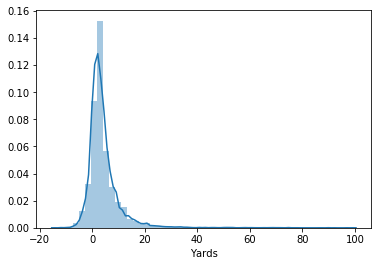

In [129]:
sns.distplot(y_train)

In [96]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
import lightgbm as lgb
import gc
import pickle
import tqdm

In [145]:
folds=10
seed=12
kf = KFold(n_splits = folds, shuffle = True, random_state=seed)

In [146]:
y_valid_pred = np.zeros(X_train.shape[0])
models = []

In [147]:
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx,:], y_train[tr_idx]
    vl_x, vl_y = X_train.iloc[val_idx,:], y_train[val_idx]
            
    print(len(tr_x),len(vl_x))
    tr_data = lgb.Dataset(tr_x, label=tr_y)
    vl_data = lgb.Dataset(vl_x, label=vl_y)  
    clf = lgb.LGBMRegressor(n_estimators=200,learning_rate=0.01)
    clf.fit(tr_x, tr_y,
        eval_set=[(vl_x, vl_y)],
        early_stopping_rounds=20,
        verbose=False)
    y_valid_pred[val_idx] += clf.predict(vl_x, num_iteration=clf.best_iteration_)
    models.append(clf)

gc.collect()

458785 50977
458785 50977
458786 50976
458786 50976
458786 50976
458786 50976
458786 50976
458786 50976
458786 50976
458786 50976


37

In [149]:
y_pred = np.zeros((509762//22,199))
y_ans = np.zeros((509762//22,199))

for i,p in enumerate(np.round(scaler.inverse_transform(y_valid_pred))):
    p+=99
    for j in range(199):
        if j>=p+10:
            y_pred[i][j]=1.0
        elif j>=p-10:
            y_pred[i][j]=(j+10-p)*0.05

for i,p in enumerate(scaler.inverse_transform(y_train)):
    p+=99
    for j in range(199):
        if j>=p:
            y_ans[i][j]=1.0

print("validation score:",np.sum(np.power(y_pred-y_ans,2))/(199*(509762//22)))

ValueError: y contains previously unseen labels: [ 1.10874714  1.11277754  1.12055466 ... 59.14685477 59.34752492
 60.94419329]

In [13]:
train.to_csv('input/FEd_train.csv', index=False)

In [126]:
aa = pd.read_csv('input/FEd_train.csv')


In [131]:
for i in categorical:
    try:
        scaler = preprocessing.LabelEncoder()
        X_train[i] = scaler.fit_transform(X_train[i])
    except:
        print(i)

FieldPosition


In [80]:
scaler = preprocessing.LabelEncoder()

In [81]:
scaler.fit_transform(X_train['Season'])

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [84]:
X_train = X_train.fillna('NAN')

In [87]:
aa['OffenseFormation']

0            SHOTGUN
1            SHOTGUN
2            SHOTGUN
3            SHOTGUN
4            SHOTGUN
             ...    
509757    SINGLEBACK
509758    SINGLEBACK
509759    SINGLEBACK
509760    SINGLEBACK
509761    SINGLEBACK
Name: OffenseFormation, Length: 509762, dtype: object

In [134]:
aa['FieldPosition'] = aa['FieldPosition'].fillna('NAN')

In [136]:
aa['FieldPosition'].unique()

array(['NE', 'KC', 'NAN', 'BUF', 'NYJ', 'ATL', 'CHI', 'CIN', 'BLT', 'CLV',
       'PIT', 'ARZ', 'DET', 'JAX', 'HST', 'TEN', 'OAK', 'WAS', 'PHI',
       'LA', 'IND', 'GB', 'SEA', 'CAR', 'SF', 'DAL', 'NYG', 'NO', 'MIN',
       'DEN', 'LAC', 'TB', 'MIA'], dtype=object)

In [140]:
scaler = preprocessing.LabelEncoder()
X_train['FieldPosition'] = scaler.fit_transform(aa['FieldPosition'])

In [139]:
train['FieldPosition'].unique()

array(['NE', 'KC', nan, 'BUF', 'NYJ', 'ATL', 'CHI', 'CIN', 'BLT', 'CLV',
       'PIT', 'ARZ', 'DET', 'JAX', 'HST', 'TEN', 'OAK', 'WAS', 'PHI',
       'LA', 'IND', 'GB', 'SEA', 'CAR', 'SF', 'DAL', 'NYG', 'NO', 'MIN',
       'DEN', 'LAC', 'TB', 'MIA'], dtype=object)